<a href="https://colab.research.google.com/github/krumeto/own_work/blob/master/Fashion_MNIST_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import mean
from numpy import std

In [0]:
np.random.seed(33)
tf.random.set_seed(33)

In [4]:
tf.__version__

'2.0.0-alpha0'

## 1. Simple model as in the Tensorflow guide

In [0]:
#Loading the dataset and splitting into test/train sets
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
print(train_images.shape)
print(train_images.dtype)


(60000, 28, 28)
uint8


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

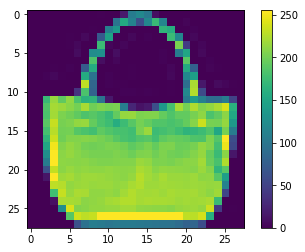

In [8]:
#Check images

plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

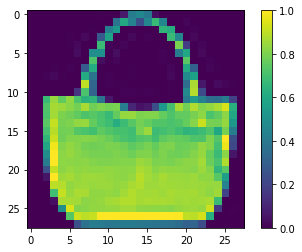

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Check images again

plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

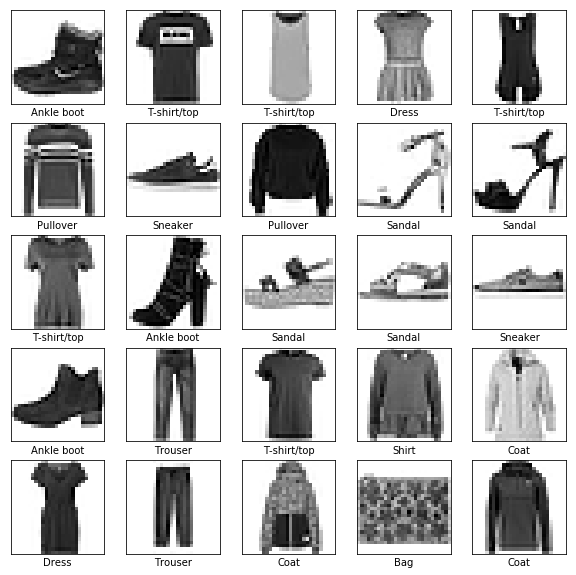

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Building the model
base_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [12]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
base_model.layers

In [14]:
weights, biases = base_model.layers[1].get_weights()
print(weights.shape, biases.shape)

(784, 300) (300,)


In [0]:
base_model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy']
)

In [16]:
history = base_model.fit(train_images, train_labels, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.4824 - accuracy: 0.8274 - val_loss: 0.4038 - val_accuracy: 0.8518
Epoch 2/30
54000/54000 [==============================] - 5s 95us/sample - loss: 0.3626 - accuracy: 0.8673 - val_loss: 0.3570 - val_accuracy: 0.8717
Epoch 3/30
54000/54000 [==============================] - 5s 95us/sample - loss: 0.3272 - accuracy: 0.8789 - val_loss: 0.3978 - val_accuracy: 0.8580
Epoch 4/30
54000/54000 [==============================] - 5s 95us/sample - loss: 0.3019 - accuracy: 0.8874 - val_loss: 0.3416 - val_accuracy: 0.8757
Epoch 5/30
54000/54000 [==============================] - 5s 94us/sample - loss: 0.2882 - accuracy: 0.8926 - val_loss: 0.3470 - val_accuracy: 0.8720
Epoch 6/30
54000/54000 [==============================] - 5s 95us/sample - loss: 0.2707 - accuracy: 0.8990 - val_loss: 0.3397 - val_accuracy: 0.8775
Epoch 7/30
54000/54000 [==============================] 

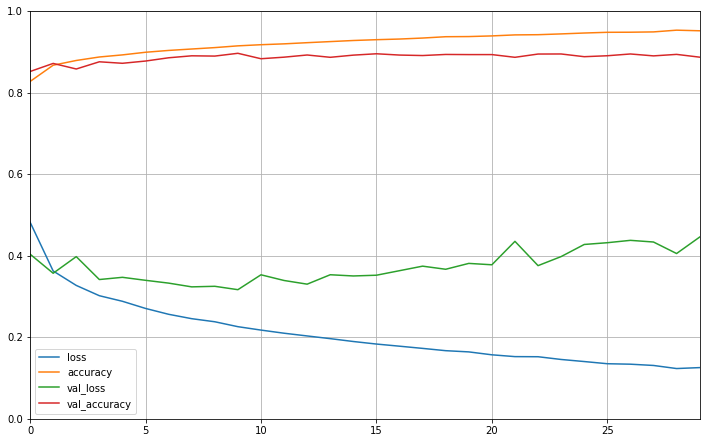

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8*1.5,5*1.5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range to 0-1
plt.show()

In [25]:
base_model_test_loss, base_model_test_acc = base_model.evaluate(test_images, test_labels)

print('\nTest accuracy:', base_model_test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.4820 - accuracy: 0.8877

Test accuracy: 0.8877


In [0]:
predictions = base_model.predict(test_images)

In [20]:
predictions[100]

array([1.7052168e-02, 2.0600786e-09, 1.6594554e-04, 9.8215288e-01,
       2.0492136e-05, 1.0403265e-11, 6.0860836e-04, 7.7549339e-15,
       4.6065746e-10, 1.5778070e-16], dtype=float32)

In [21]:
np.argmax(predictions[100])

3

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

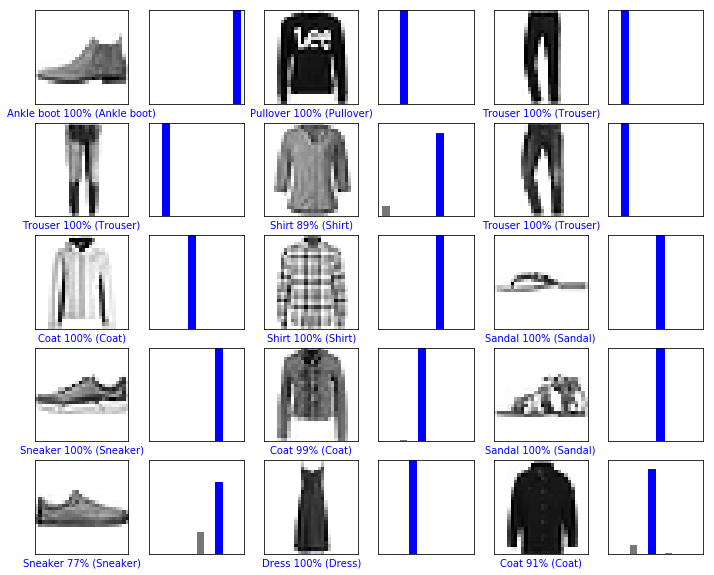

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### 2. Test the base model with different initializations

In [0]:
#Building the model
base_model_he_normal = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [0]:
base_model_he_normal.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy']
)

In [29]:
history_he = base_model_he_normal.fit(train_images, train_labels, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 106us/sample - loss: 0.4800 - accuracy: 0.8284 - val_loss: 0.4422 - val_accuracy: 0.8375
Epoch 2/30
54000/54000 [==============================] - 5s 98us/sample - loss: 0.3638 - accuracy: 0.8669 - val_loss: 0.3493 - val_accuracy: 0.8702
Epoch 3/30
54000/54000 [==============================] - 5s 98us/sample - loss: 0.3250 - accuracy: 0.8798 - val_loss: 0.3704 - val_accuracy: 0.8663
Epoch 4/30
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3002 - accuracy: 0.8887 - val_loss: 0.3212 - val_accuracy: 0.8807
Epoch 5/30
54000/54000 [==============================] - 5s 98us/sample - loss: 0.2839 - accuracy: 0.8936 - val_loss: 0.3228 - val_accuracy: 0.8830
Epoch 6/30
54000/54000 [==============================] - 5s 97us/sample - loss: 0.2673 - accuracy: 0.8996 - val_loss: 0.3247 - val_accuracy: 0.8790
Epoch 7/30
54000/54000 [==============================] 

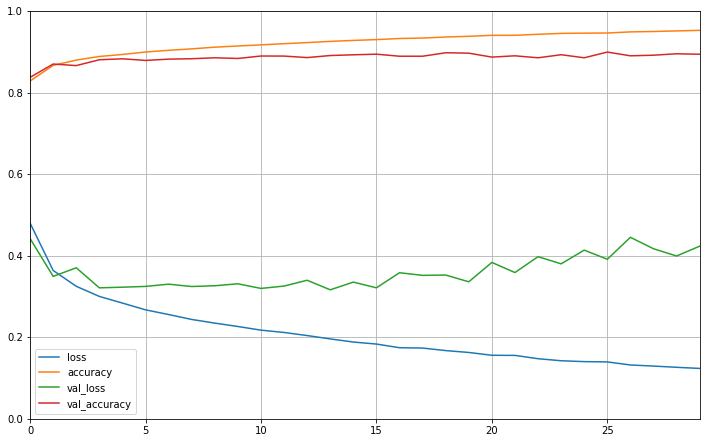

In [30]:
pd.DataFrame(history_he.history).plot(figsize = (8*1.5,5*1.5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range to 0-1
plt.show()

In [31]:
base_model_he_test_loss, base_model_he_test_acc = base_model_he_normal.evaluate(test_images, test_labels)

print('\nTest accuracy:', base_model_he_test_acc)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.4700 - accuracy: 0.8925

Test accuracy: 0.8925


### 2.1. Testing Elu + He initialization

In [0]:
#Building the model
base_model_he_normal_elu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [0]:
base_model_he_normal_elu.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy']
)

In [37]:
history_elu_he = base_model_he_normal_elu.fit(train_images, train_labels, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 102us/sample - loss: 0.4820 - accuracy: 0.8249 - val_loss: 0.3929 - val_accuracy: 0.8613
Epoch 2/30
54000/54000 [==============================] - 5s 98us/sample - loss: 0.3643 - accuracy: 0.8638 - val_loss: 0.3797 - val_accuracy: 0.8617
Epoch 3/30
54000/54000 [==============================] - 5s 97us/sample - loss: 0.3297 - accuracy: 0.8773 - val_loss: 0.3524 - val_accuracy: 0.8752
Epoch 4/30
54000/54000 [==============================] - 6s 103us/sample - loss: 0.3081 - accuracy: 0.8856 - val_loss: 0.3405 - val_accuracy: 0.8770
Epoch 5/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.2869 - accuracy: 0.8930 - val_loss: 0.3394 - val_accuracy: 0.8753
Epoch 6/30
54000/54000 [==============================] - 5s 100us/sample - loss: 0.2689 - accuracy: 0.9000 - val_loss: 0.3419 - val_accuracy: 0.8803
Epoch 7/30
54000/54000 [=============================

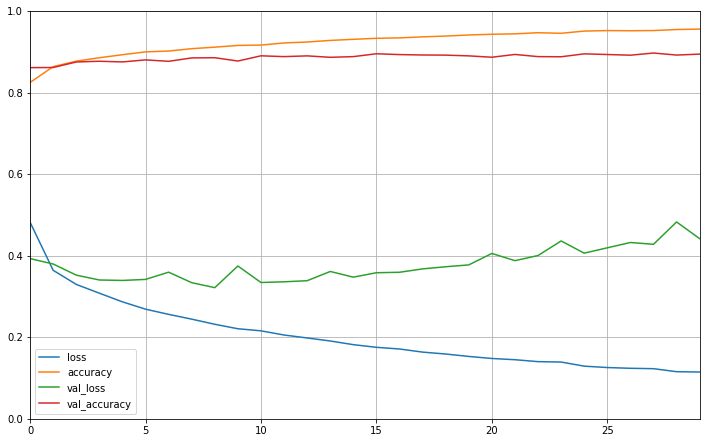

In [38]:
pd.DataFrame(history_elu_he.history).plot(figsize = (8*1.5,5*1.5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range to 0-1
plt.show()

In [39]:
base_model_he_elu_test_loss, base_model_he_elu_test_acc = base_model_he_normal_elu.evaluate(test_images, test_labels)

print('\nTest accuracy:', base_model_he_elu_test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.4786 - accuracy: 0.8907

Test accuracy: 0.8907


In [0]:
#Building the model
base_model_batchnorm = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
    ])

In [0]:
base_model_batchnorm.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy']
)

In [44]:
history_batchnorm = base_model_batchnorm.fit(train_images, train_labels, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 10s 182us/sample - loss: 0.4685 - accuracy: 0.8318 - val_loss: 0.3743 - val_accuracy: 0.8592
Epoch 2/30
54000/54000 [==============================] - 9s 168us/sample - loss: 0.3634 - accuracy: 0.8656 - val_loss: 0.3285 - val_accuracy: 0.8805
Epoch 3/30
54000/54000 [==============================] - 9s 172us/sample - loss: 0.3238 - accuracy: 0.8820 - val_loss: 0.3253 - val_accuracy: 0.8790
Epoch 4/30
54000/54000 [==============================] - 9s 165us/sample - loss: 0.2954 - accuracy: 0.8901 - val_loss: 0.3173 - val_accuracy: 0.8813
Epoch 5/30
54000/54000 [==============================] - 9s 165us/sample - loss: 0.2733 - accuracy: 0.8984 - val_loss: 0.3151 - val_accuracy: 0.8858
Epoch 6/30
54000/54000 [==============================] - 9s 164us/sample - loss: 0.2553 - accuracy: 0.9043 - val_loss: 0.3163 - val_accuracy: 0.8830
Epoch 7/30
54000/54000 [==========================

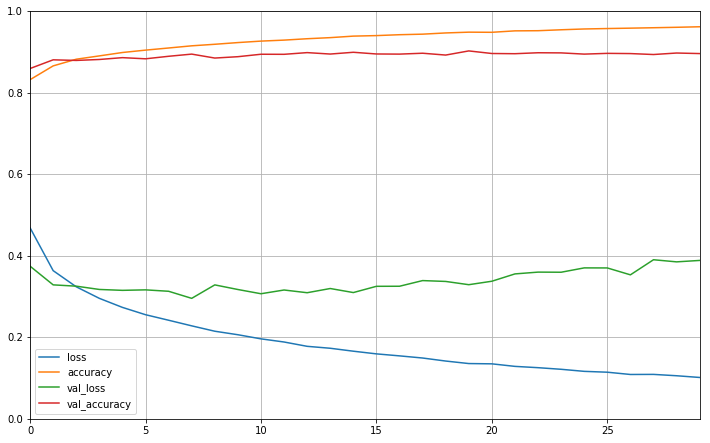

In [45]:
pd.DataFrame(history_batchnorm.history).plot(figsize = (8*1.5,5*1.5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range to 0-1
plt.show()

In [46]:
base_model_batchnorm_loss, base_model_batchnorm_acc = base_model_batchnorm.evaluate(test_images, test_labels)

print('\nTest accuracy:', base_model_batchnorm_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.4275 - accuracy: 0.8936

Test accuracy: 0.8936


In [0]:
model_dropout = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(10, activation="softmax")
])


In [0]:
model_dropout.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy']
)

In [49]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 113us/sample - loss: 0.5875 - accuracy: 0.7882 - val_loss: 0.4444 - val_accuracy: 0.8363
Epoch 2/30
54000/54000 [==============================] - 6s 105us/sample - loss: 0.4605 - accuracy: 0.8301 - val_loss: 0.3772 - val_accuracy: 0.8610
Epoch 3/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.4235 - accuracy: 0.8411 - val_loss: 0.3579 - val_accuracy: 0.8655
Epoch 4/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.4012 - accuracy: 0.8506 - val_loss: 0.3497 - val_accuracy: 0.8723
Epoch 5/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.3860 - accuracy: 0.8562 - val_loss: 0.3770 - val_accuracy: 0.8560
Epoch 6/30
54000/54000 [==============================] - 6s 106us/sample - loss: 0.3736 - accuracy: 0.8613 - val_loss: 0.3382 - val_accuracy: 0.8702
Epoch 7/30
54000/54000 [===========================

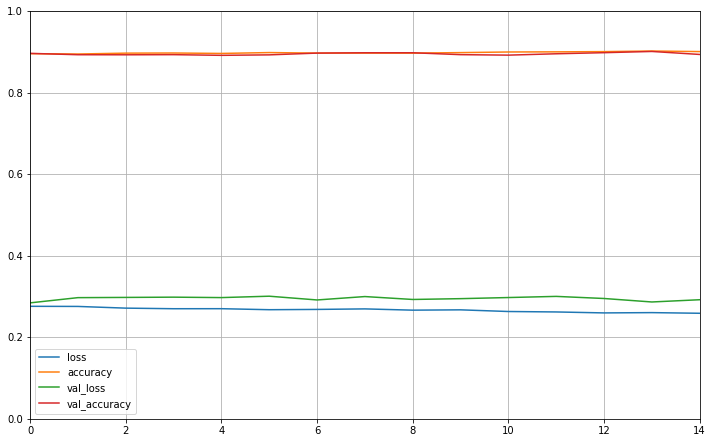

In [53]:
pd.DataFrame(history_dropout.history).plot(figsize = (8*1.5,5*1.5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range to 0-1
plt.show()

In [54]:
model_dropout_loss, model_dropout_acc = model_dropout.evaluate(test_images, test_labels)

print('\nTest accuracy:', model_dropout_acc)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3149 - accuracy: 0.8915

Test accuracy: 0.8915


In [52]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=15, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 6s 107us/sample - loss: 0.2759 - accuracy: 0.8956 - val_loss: 0.2844 - val_accuracy: 0.8963
Epoch 2/15
54000/54000 [==============================] - 6s 103us/sample - loss: 0.2756 - accuracy: 0.8947 - val_loss: 0.2972 - val_accuracy: 0.8930
Epoch 3/15
54000/54000 [==============================] - 6s 103us/sample - loss: 0.2714 - accuracy: 0.8969 - val_loss: 0.2977 - val_accuracy: 0.8928
Epoch 4/15
54000/54000 [==============================] - 6s 103us/sample - loss: 0.2700 - accuracy: 0.8972 - val_loss: 0.2984 - val_accuracy: 0.8932
Epoch 5/15
54000/54000 [==============================] - 6s 104us/sample - loss: 0.2701 - accuracy: 0.8961 - val_loss: 0.2973 - val_accuracy: 0.8915
Epoch 6/15
54000/54000 [==============================] - 6s 103us/sample - loss: 0.2676 - accuracy: 0.8983 - val_loss: 0.3007 - val_accuracy: 0.8927
Epoch 7/15
54000/54000 [===========================

In [0]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def decreasing_neurons(init_neurons, n_layers):
  np_array = init_neurons*np.logspace(1.0, 0.0, n_layers, base=10) / 10
  return np_array.astype(int)

In [0]:
def build_model(n_hidden=1, n_neurons=300, learning_rate=3e-3, input_shape=[28, 28]):
    model = keras.models.Sequential()
    #options = {"input_shape": input_shape}
    model.add(keras.layers.Flatten(input_shape=input_shape))
    neurons_per_layer = decreasing_neurons(n_neurons, n_hidden)
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(neurons_per_layer[layer], activation="relu"))
        options = {}
    model.add(keras.layers.Dense(10, activation="softmax", **options))
    
    model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy'])
    return model

In [0]:
test_model = build_model(n_hidden=2)

In [148]:
test_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_32 (Dense)             (None, 30)                9030      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                310       
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


In [134]:
decreasing_neurons(300, 4)

array([300, 139,  64,  30])

In [130]:
n_hidden = 4
for i in range(n_hidden):
  np_array = 300*np.logspace(1.0, 0.0, n_hidden, base=10) / 10
  print(int(np_array[i]))
 

300
139
64
30


In [127]:
300*np.logspace(1.0, 0.0, 4, base=10) / 10

array([300.        , 139.24766501,  64.6330407 ,  30.        ])

In [99]:
np.round(np.logspace(10, 1, 10), 2)

array([1.e+10, 1.e+09, 1.e+08, 1.e+07, 1.e+06, 1.e+05, 1.e+04, 1.e+03,
       1.e+02, 1.e+01])

In [94]:
for i in reciprocal(3e-4, 3e-2):
  print(i)

TypeError: ignored